### Read and apply tensorflow frozen model

Normally, Tensorflow model contains four files:
1. **model-ckpt.index:** Contains metadata information which is usfull in training.
2. **checkpoint:** Contains ckpoints information.
3. **model-ckpt.meta:** Holds the complete graph. 
4. **model-ckpt.data-0000-of-00001:** Accommodate the variables such as weights, biases and hyper-parameters.

When we want to deploy a  TF model in production (inference). The unnecessary information should be removed. We used *Graph freezing* operation in tensorflow to save essential information for inference. Graph freezing removes useless data for inference and gives us a single encapsulated file called *frozen graph_def* with .pd extension.

Here we show how to use a frozen model to detect objects using Tesorflow and OpenCV.


In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import cv2 as cv
print( 'OpenCV %s  tensorflow %s'% ( cv.__version__,tf.__version__)) 

OpenCV 3.4.0  tensorflow 1.10.0


In [11]:
with open('../DataSet/id/coco_class.txt') as flist:
    name= flist.read().splitlines() 


In [9]:
with tf.gfile.FastGFile('../Models/ssd_mobilenet_coco/frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

In [10]:
with tf.Session() as sess:
    # Restore session
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')


    img = cv.imread('../Images/1.png')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, ::-1]

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})

In [5]:
    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.1:
            print(name[classId-1])
            x = bbox[1] * cols
            y = bbox[0] * rows
            cv.putText(img,name[classId-1], (int(x), int(y)), cv.FONT_HERSHEY_SIMPLEX, 1, 255)
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

horse
person
horse
person
car
person


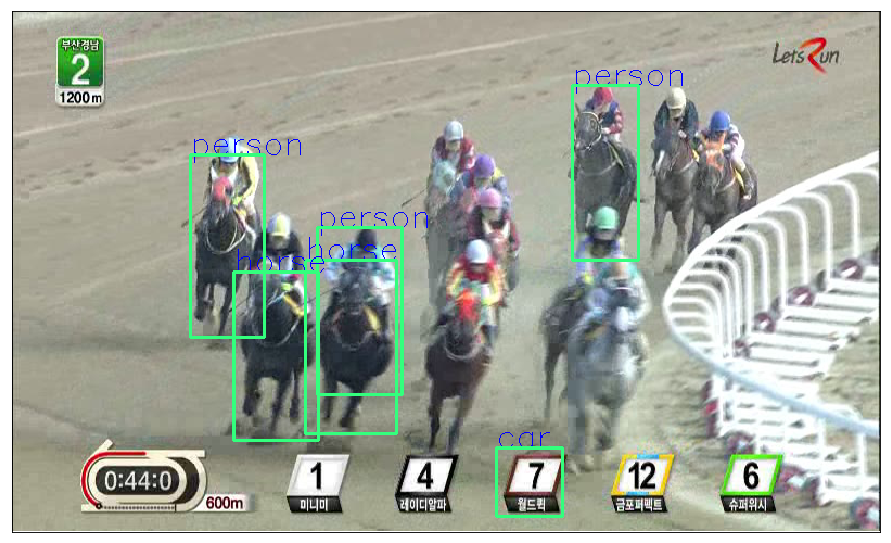

In [6]:
dis=img[:,:,::-1]
fig=plt.figure(figsize=(14, 12), dpi= 80)
plt.xticks([])
plt.yticks([])
plt.imshow(dis)